In [1]:
import pandas as pd

In [2]:
ratings_data = pd.read_csv(r"F:\Μαθήματα_Στέργιος\Ανακάλυψη_Γνώσης_Από_Βάσεις_Δεδομένων\PP2\ml-latest-small\ratings.csv")

In [3]:
df = pd.DataFrame(ratings_data)
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
import surprise
from surprise import SVD
from surprise.prediction_algorithms import KNNBasic,KNNWithMeans
from surprise import Dataset,Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import Trainset
from sklearn import metrics 
import numpy as np
import math


# data = df.to_xarray()
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[["userId", "movieId", "rating"]], reader)

trainset, testset = train_test_split(data, test_size=0.2)

# Define the matrix factorization-based algorithm
algo = SVD()

# Train the algorithm on the training set
algo.fit(trainset)

# Predict ratings for the test set
sim_options = {
    "name": "pearson",
    "user_based": True,  # compute  similarities between users
}

mae1=0
mae2=0
mae3=0
mae4=0

for i in range(2,7):
    #KNNBasic algorithm
    print("KNNBasic algorithm: ")
    algo1 = KNNBasic(k=i,sim_options=sim_options)
    algo1.fit(trainset)
    prediction1 = algo1.test(testset)
    if(i==6):
        mae1 += accuracy.mae(prediction1,verbose=True)
    else:
        mae1 += accuracy.mae(prediction1,verbose=False)
    #KNNWithMeans algorithm
    print("KNNWithMeans algorithm: ")
    algo2 = KNNWithMeans(k=i,sim_options=sim_options)
    algo2.fit(trainset)
    prediction2 = algo2.test(testset)
    if(i==6):
        mae2 += accuracy.mae(prediction2,verbose=True)
    else:
        mae2 += accuracy.mae(prediction2,verbose=False)
    




KNNBasic algorithm: 
Computing the pearson similarity matrix...
Done computing similarity matrix.
KNNWithMeans algorithm: 
Computing the pearson similarity matrix...
Done computing similarity matrix.
KNNBasic algorithm: 
Computing the pearson similarity matrix...
Done computing similarity matrix.
KNNWithMeans algorithm: 
Computing the pearson similarity matrix...
Done computing similarity matrix.
KNNBasic algorithm: 
Computing the pearson similarity matrix...
Done computing similarity matrix.
KNNWithMeans algorithm: 
Computing the pearson similarity matrix...
Done computing similarity matrix.
KNNBasic algorithm: 
Computing the pearson similarity matrix...
Done computing similarity matrix.
KNNWithMeans algorithm: 
Computing the pearson similarity matrix...
Done computing similarity matrix.
KNNBasic algorithm: 
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.7806
KNNWithMeans algorithm: 
Computing the pearson similarity matrix...
Done computing simila

In [5]:
list_of_lists = []
for tup in prediction1:
    list_of_lists.append(list(prediction1))
list_of_lists02 = []
for tup in prediction2:
    list_of_lists02.append(list(prediction2))   

KNNBasic algorithm: 
Confusion Matrix:
[[16612     0]
 [    0  3305]]


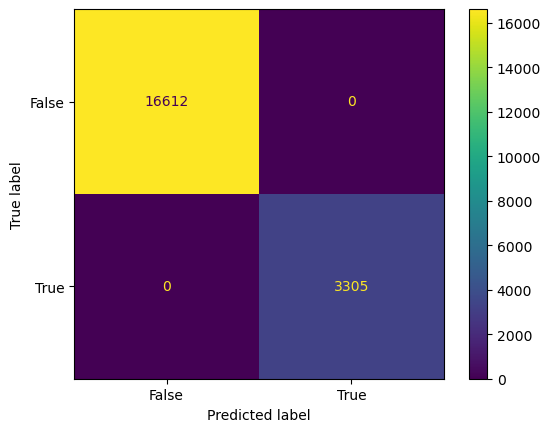

Precision =  0.7992744860943168
Recall =  0.9824613555291319
KNNWithMeans algorithm: 
Confusion Matrix:
[[16159     0]
 [    0  4009]]


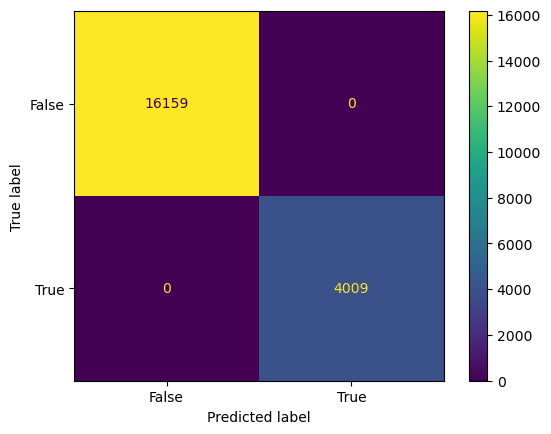

Precision =  0.827109552300392
Recall =  0.927794492015737


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import math 

def customConfusionMatrix(targets,preds):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for y,y_hat in zip(targets,preds):
        if y==y_hat:
            TP += 1
        elif y!=y_hat:
            TN += 1
        elif y in targets  and y_hat not in targets:
            FN += 1
        elif y not in preds and y_hat in preds:
            FP += 1
    return np.array([[TN,FP],
                     [FN,TP]])

def customPrecision(targets,preds):
    TP = 0
    FP = 0
    for y,y_hat in zip(targets,preds):
        
        if y==y_hat:
            TP += 1
        elif y not in  preds and y_hat in preds:
            FP +=1
            
    return TP / (TP + FP)

def customRecall(targets,preds):
    TP = 0
    FN = 0
    for y,y_hat in zip(targets,preds):
        
        if y==y_hat:
            TP += 1
        elif y in targets and y_hat not in targets:
            FN +=1
            
    return TP / (TP + FN)

#KNNBasic
y_target=np.array(float,None)
y_pred=np.array(float,None)
for j in range(len(list_of_lists)):
    m=0
    for i in list_of_lists[0][j]:
        m+=1
        
        if(m==3):
            y_target= np.append(y_target,i)
        if(m==4):
            if(i%1 > 0.5):
                y_pred=np.append(y_pred,float(math.ceil(i)))
            if(i%1 < 0.5):
                y_pred=np.append(y_pred,math.floor(i)+0.5)


confusion_matrix = customConfusionMatrix(y_target,y_pred)
print("KNNBasic algorithm: ")
print("Confusion Matrix:",confusion_matrix,sep="\n")

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
precision1 = customPrecision(y_target,y_pred)
print("Precision = ",precision1)
recall1 = customRecall(y_target,y_pred)
print("Recall = ",recall1)
 

#KNNWithMeans
y_target=np.array(float,None)
y_pred=np.array(float,None)
for j in range(len(list_of_lists02)):
    m=0
    for i in list_of_lists02[0][j]:
        m+=1
        
        if(m==3):
            y_target= np.append(y_target,i)
        if(m==4):
            if(i%1 > 0.5):
                y_pred=np.append(y_pred,float(math.ceil(i)))
            if(i%1 < 0.5):
                y_pred=np.append(y_pred,math.floor(i)+0.5)
confusion_matrix = customConfusionMatrix(y_target,y_pred)
print("KNNWithMeans algorithm: ")
print("Confusion Matrix:",confusion_matrix,sep="\n")

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
precision2 = customPrecision(y_target,y_pred)
print("Precision = ",precision2)
recall2 = customRecall(y_target,y_pred)
print("Recall = ",recall2)

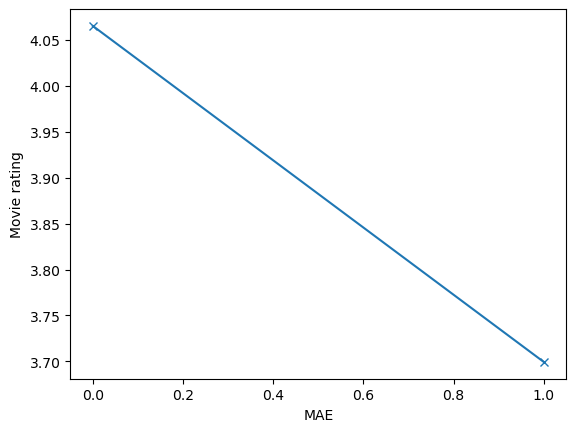

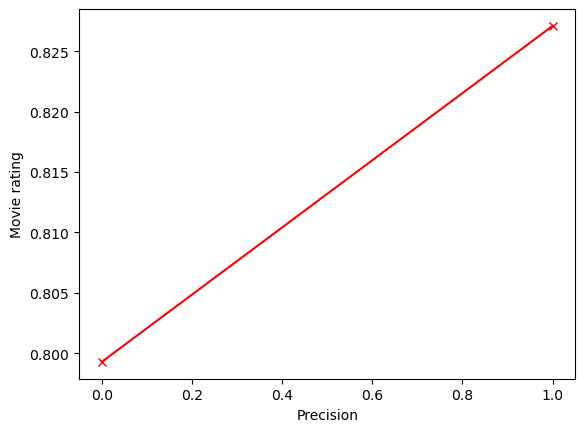

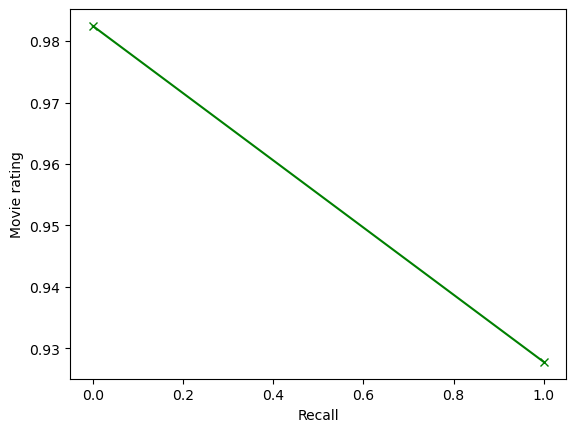

In [7]:
ypoints_mae = np.array([mae1,mae2])
ypoints_precision=np.array([precision1,precision2])
ypoints_recall=np.array([recall1,recall2])

plt.plot(ypoints_mae,marker='x')
plt.ylabel('Movie rating')
plt.xlabel('MAE')
plt.show()
plt.plot(ypoints_precision,marker='x',color='red')
plt.ylabel('Movie rating')
plt.xlabel('Precision')
plt.show()
plt.plot(ypoints_recall,marker='x',color='green')
plt.ylabel('Movie rating')
plt.xlabel('Recall')
plt.show()